# SA1

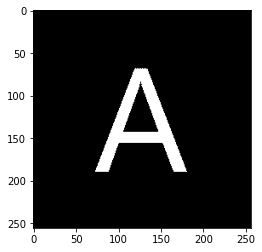

In [7]:
import numpy as np

from PIL import Image
from matplotlib import pyplot as plt

secret = np.logical_not(np.array(Image.open("../A_256.png").convert("1"), dtype=bool))
plt.imshow(secret, cmap="gray")

{'success': True, 'contrast': 0.07407535975324725, 'nitr': 1673, 'variables': array([[0.21478266, 0.        , 0.42610049, 0.        , 0.        ,
        0.0902578 , 0.26885905],
       [0.28190416, 0.06864822, 0.31939973, 0.        , 0.33004789,
        0.        , 0.        ],
       [0.73596848, 0.77714563, 0.5206971 , 0.44378854, 0.90049765,
        0.61456872, 1.        ]])}
False


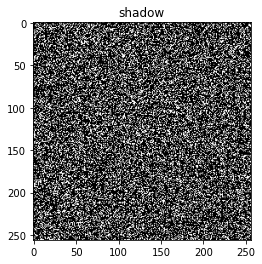

In [3]:
from optimize import optimize_sa1

K = 6
result = optimize_sa1(K, ws=25)
print(result)
if result.success:
    p0 = result.variables[0]  # 白色选择随机数发生器的概率
    p1 = result.variables[1]  # 黑色选择随机数发生器的概率
    rx = result.variables[2]  # 随机数发生器输出0(False/白色)的概率

shadows = [np.zeros(secret.shape, dtype=bool) for _ in range(K)]
D = np.zeros(secret.shape, dtype=int)
for (i, j), is_black in np.ndenumerate(secret):
    prob = p1 if is_black else p0
    rand_no = np.random.choice(a=K + 1, p=prob)
    D[i, j] = rand_no
    rand_white = rx[rand_no]
    for sh in shadows:
        sh[i, j] = np.random.choice(a=[False, True], p=[rand_white, 1 - rand_white])

plt.title("shadow")
plt.imshow(shadows[0],cmap="gray")
print((shadows[0]==shadows[1]).all())

In [8]:
from optimize import safety_penalty_list
sum(safety_penalty_list(result.variables))

0.11782319635844149

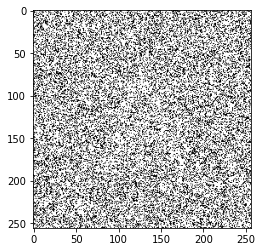

In [4]:
reveal_old=np.zeros(secret.shape,dtype=bool)
for sd in shadows:
    reveal_old=np.logical_or(reveal_old,sd)
plt.imshow(reveal_old,cmap="gray")

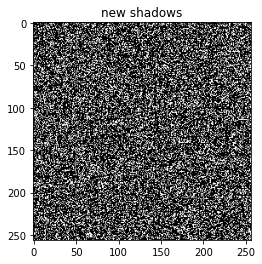

In [5]:
new_shadows = [np.zeros(secret.shape, dtype=bool) for _ in range(K)]
for (i, j), is_black in np.ndenumerate(secret):
    rand_white = rx[D[i, j]]
    for sh in new_shadows:
        sh[i, j] = np.random.choice(a=[False, True], p=[rand_white, 1 - rand_white])

plt.title("new shadows")
plt.imshow(new_shadows[0],cmap="gray")

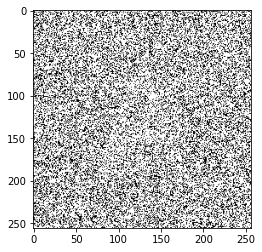

In [6]:
reveal_new=np.zeros(secret.shape,dtype=bool)
for sd in new_shadows:
    reveal_new=np.logical_or(reveal_new,sd)
plt.imshow(reveal_new,cmap="gray")